## Assumptions

* Image size (Height , Width) need to be adjusted for better edge detection

In [1]:
import json
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
meta = 'data/WLASL_v0.3.json'
videoPath = 'data/videos/'
missingInfo = 'data/missing.txt'

In [3]:
with open(missingInfo, 'r') as f:
    missingID = set(line.strip() for line in f)

with open( meta, 'r') as f:
    metadata = json.load(f)

In [4]:
df = []

In [5]:
for entry in metadata:
    gloss = entry['gloss']
    for instance in entry['instances']:
        videoID = instance['video_id']
        bbox = instance['bbox']
        # fps = instance['fps']
        # frame_end = instance['frame_end']
        # frame_start = instance['frame_start']

        df.append({
            'gloss': gloss,
            'videoID': videoID,
            'bbox': bbox,
            # 'fps': fps,
            # 'frame_end': frame_end,
            # 'frame_start': frame_start
        })

In [6]:
def handling_missingID(df, missingID):
    result = []
    for record in df:
        if record['videoID'] not in missingID:
            result.append(record)
    return result

In [7]:
data = handling_missingID(df=df, missingID=missingID)

In [8]:
cap = cv2.VideoCapture('data/videos/69241.mp4')
cap2 = cv2.VideoCapture('data/videos/03237.mp4')

In [9]:
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

In [10]:
print(f"width:{width}, height:{height}, fps:{fps}, frame_count:{frame_count}")

width:1280, height:720, fps:29, frame_count:75


In [11]:
width = int(cap2.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap2.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap2.get(cv2.CAP_PROP_FPS))
frame_count = int(cap2.get(cv2.CAP_PROP_FRAME_COUNT))

In [12]:
print(f"width:{width}, height:{height}, fps:{fps}, frame_count:{frame_count}")

width:1920, height:1080, fps:23, frame_count:43


In [13]:
import matplotlib.pyplot as plt

def plot_color_histogram(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) #Hue,Saturation,Value(HSV)
    
    hist_hue = cv2.calcHist([hsv[:,:,0]], [0], None, [256], [0, 256])
    hist_saturation = cv2.calcHist([hsv[:,:,1]], [0], None, [256], [0, 256])
    hist_brightness = cv2.calcHist([hsv[:,:,2]], [0], None, [256], [0, 256])
    
    plt.figure()
    plt.title('Color Histogram')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.plot(hist_hue, color='r', label='Hue')
    plt.plot(hist_saturation, color='g', label='Saturation')
    plt.plot(hist_brightness, color='b', label='Value')
    plt.legend(loc='upper right')
    plt.show()

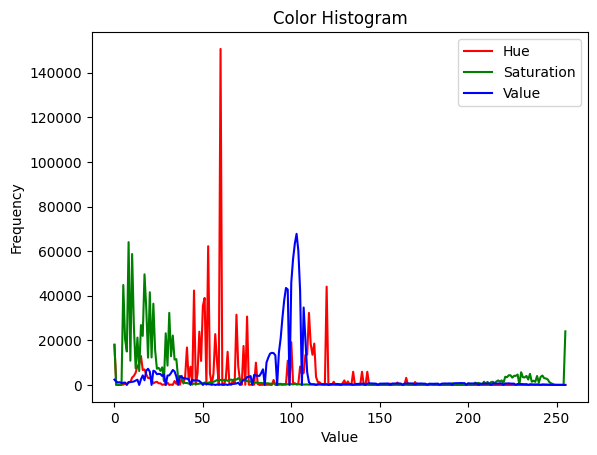

In [13]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    plot_color_histogram(frame=frame)
    break

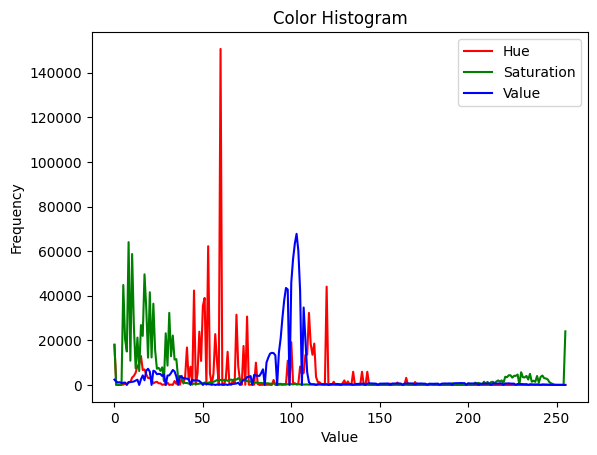

In [20]:
while cap2.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    plot_color_histogram(frame=frame)
    break

In [14]:
def detect_edges(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges

In [15]:
import matplotlib.pyplot as plt

def display_image(image, title="Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [24]:
frame_number = 1
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    edges = detect_edges(frame)
    display_image(edges, frame_number)
    frame_number += 1
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

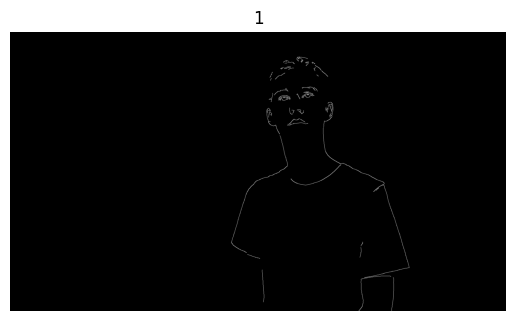

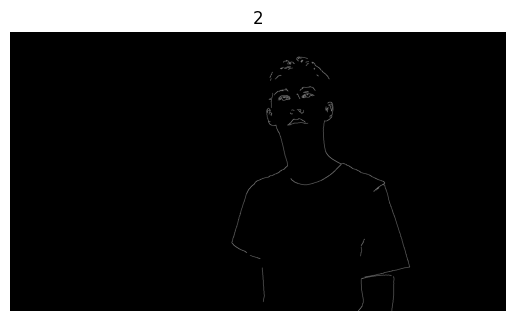

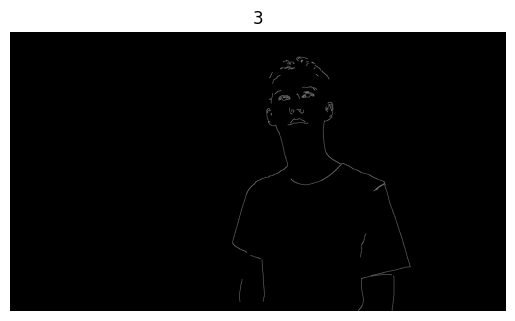

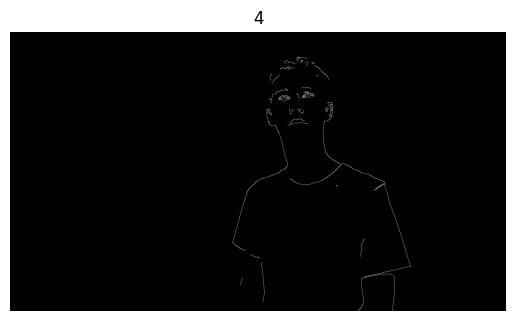

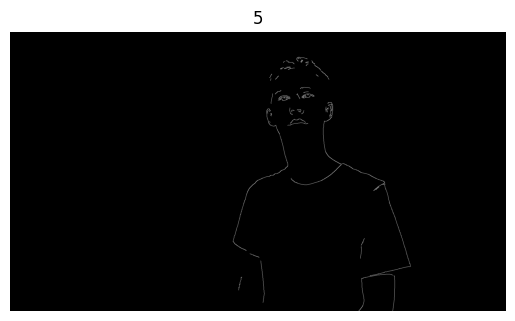

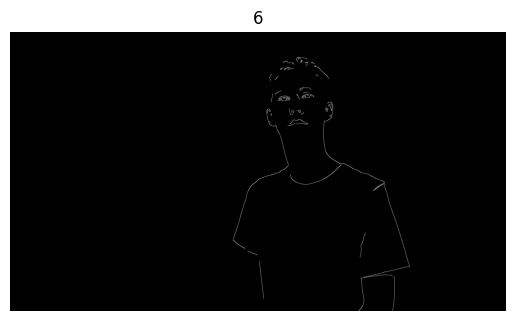

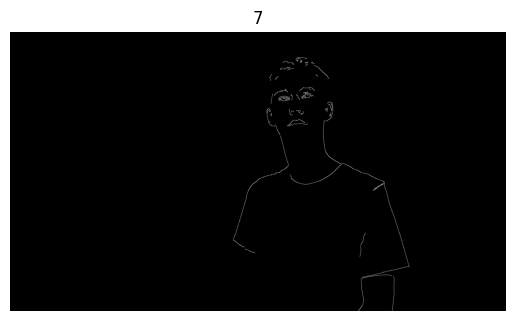

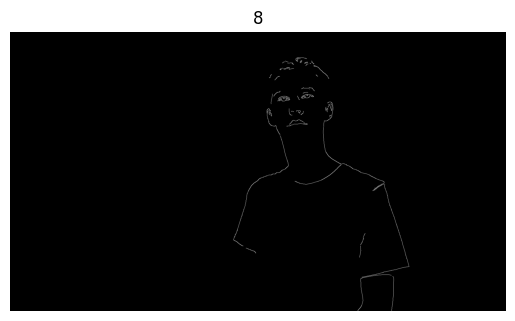

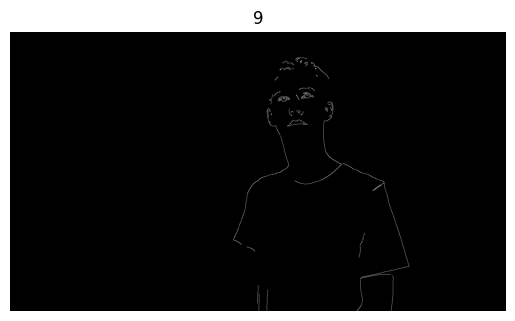

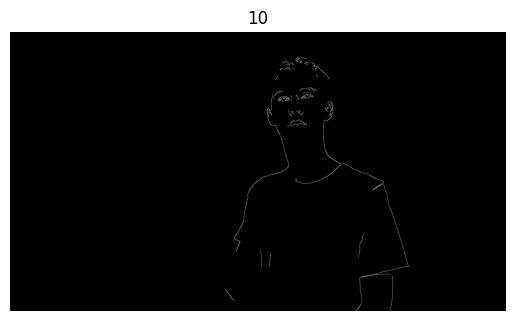

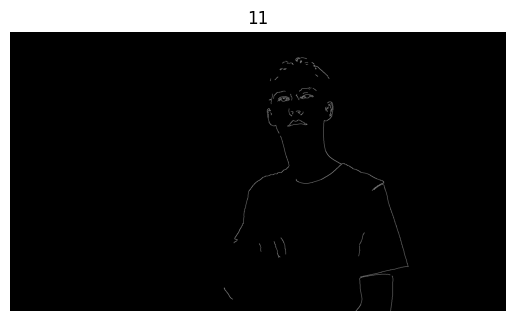

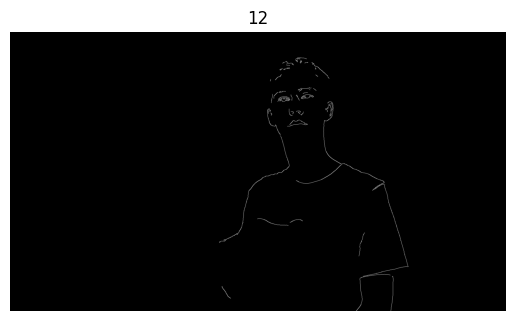

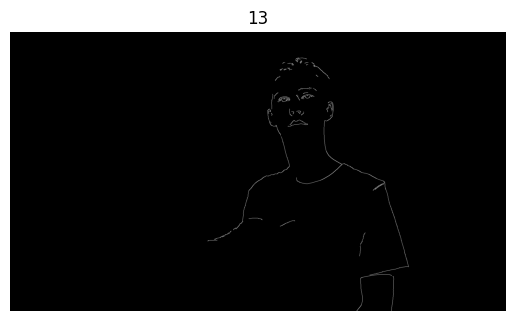

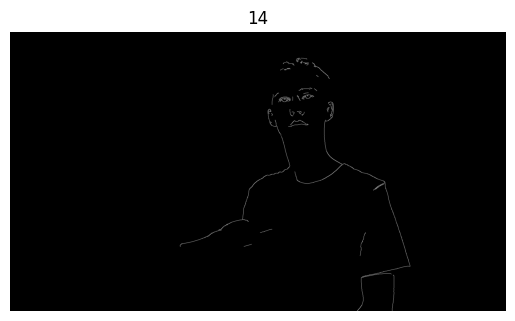

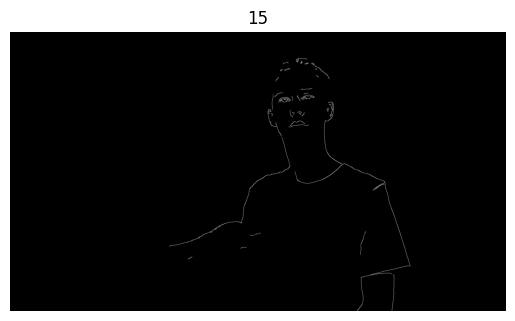

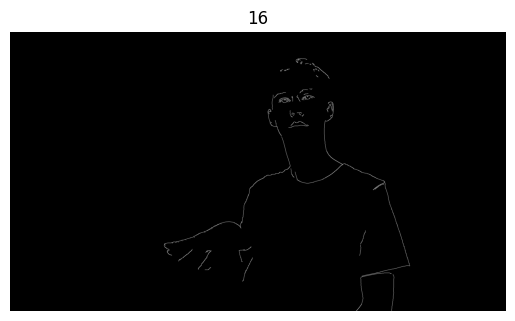

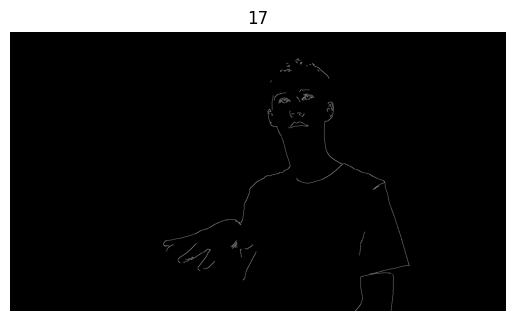

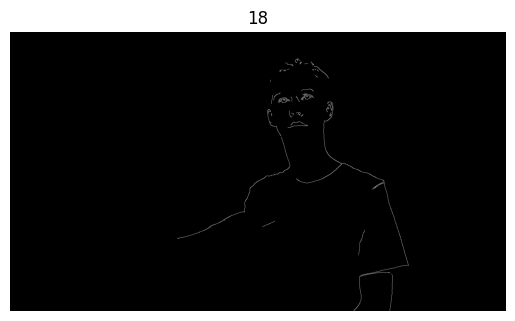

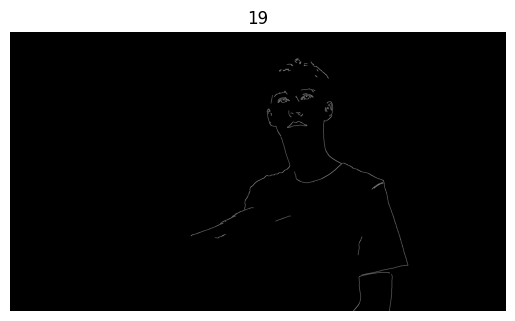

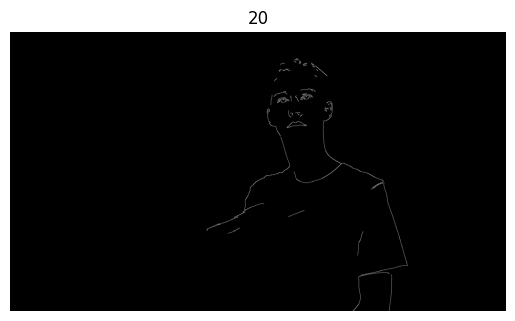

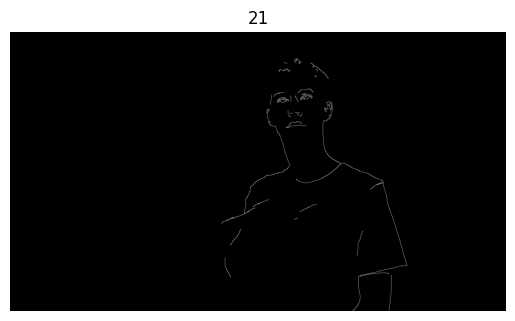

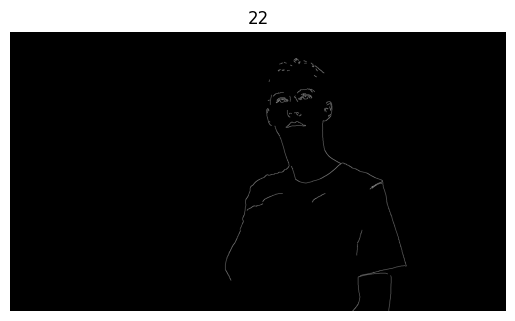

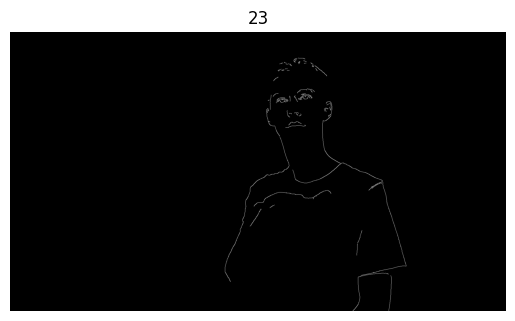

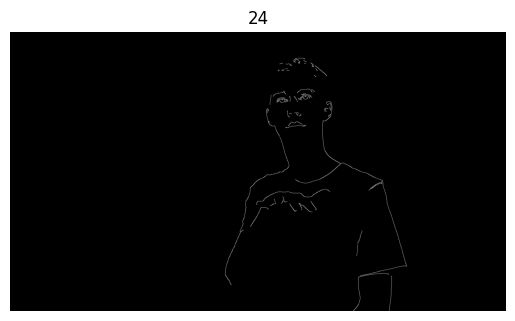

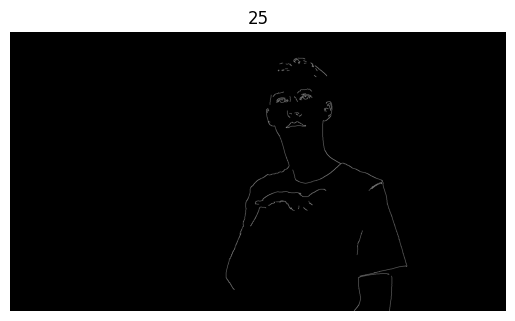

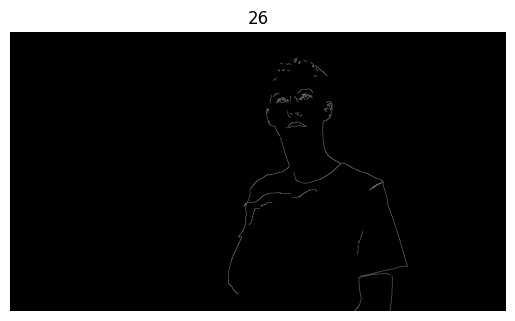

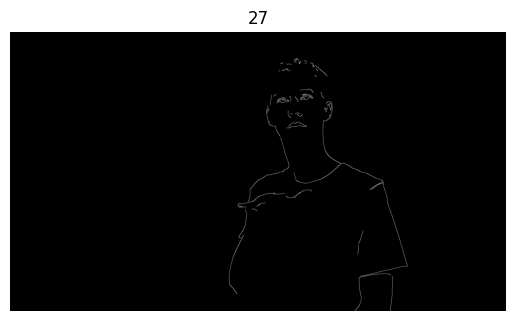

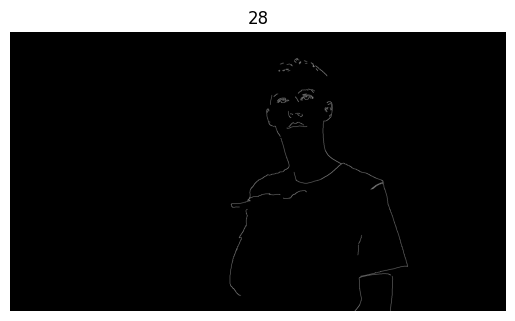

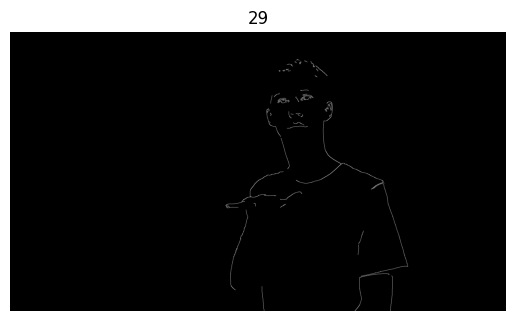

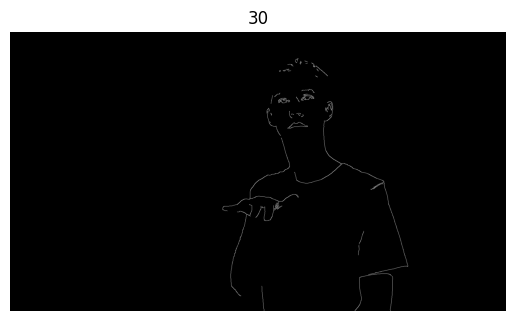

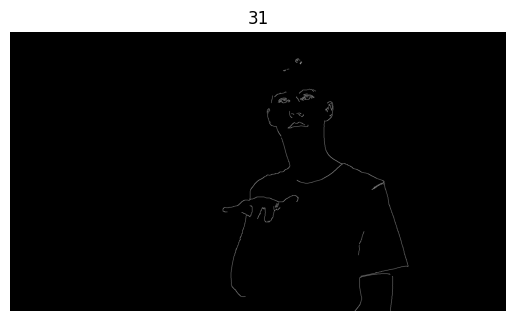

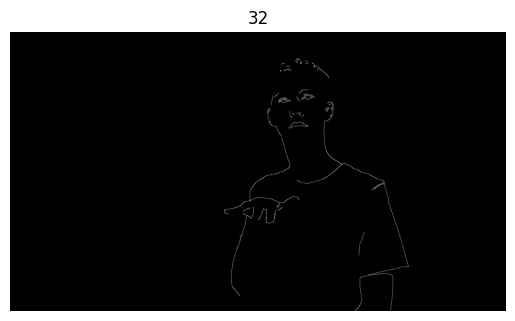

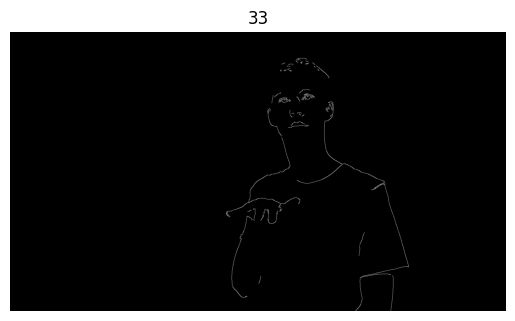

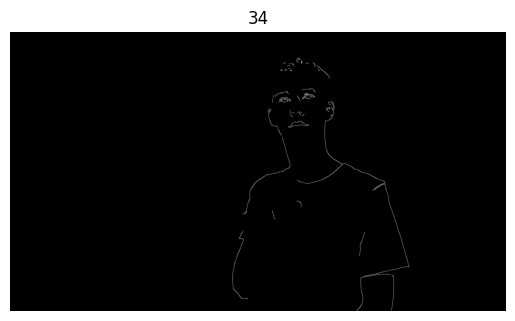

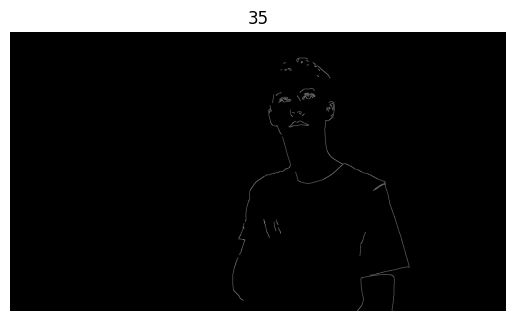

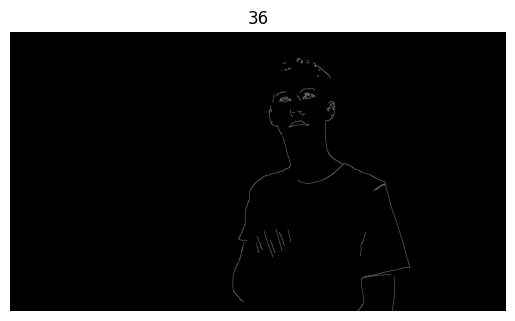

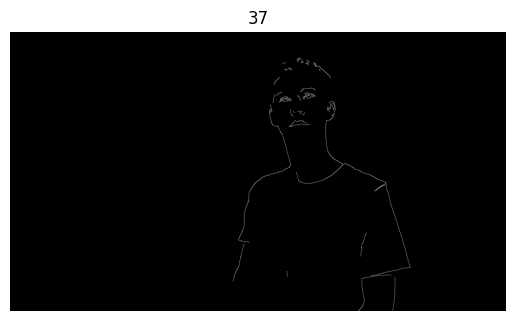

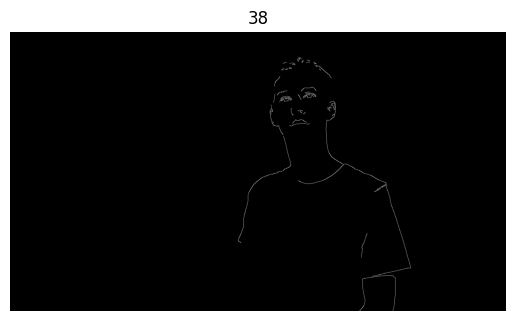

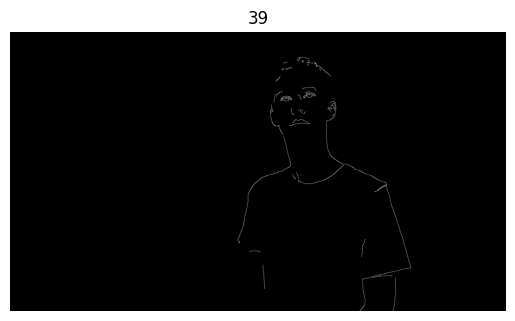

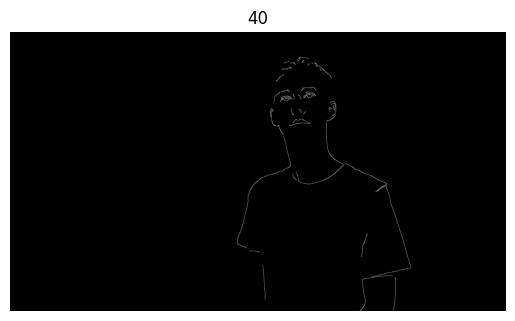

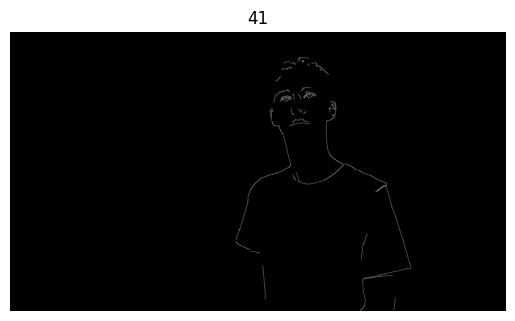

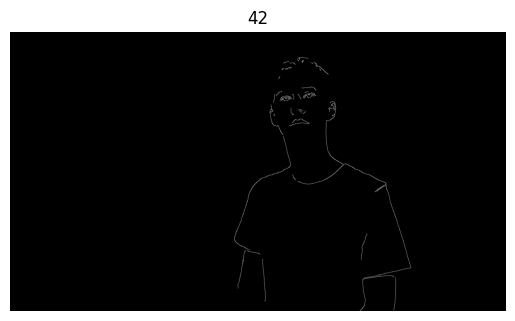

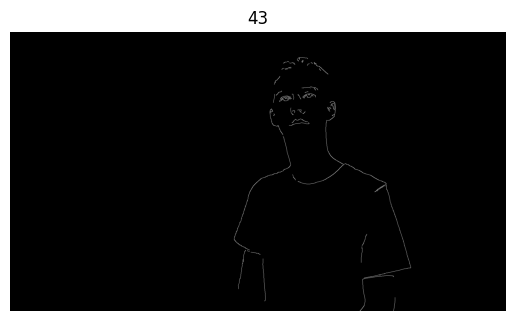

In [17]:
frame_number = 1
while cap2.isOpened():
    ret, frame = cap2.read()
    if not ret:
        break
    edges = detect_edges(frame)
    display_image(edges, frame_number)
    frame_number += 1

In [16]:
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [17]:
# def detect_faces(frame):
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
#     for (x, y, w, h) in faces:
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
#     return frame

In [18]:
# frame_number = 1
# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     face_ = detect_faces(frame=frame)
#     display_image(face_)
#     frame_number += 1

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

In [19]:
def detect_motion(prev_frame, curr_frame):
    gray_prev = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    gray_curr = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)
    diff = cv2.absdiff(gray_prev, gray_curr)
    _, thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)
    return thresh

In [20]:
pre_frame = None
frame_number = 1
while cap.isOpened():
    ret, curr_frame = cap.read()
    if not ret:
        break
    if pre_frame is None:
        pre_frame = curr_frame
        continue
    motion = detect_motion(prev_frame=pre_frame, curr_frame=curr_frame)
    display_image(motion, frame_number)
    pre_frame = curr_frame
    frame_number += 1
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

### For MediaPipe we need to change to RGB

In [21]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.5)

I0000 00:00:1726472188.474816  388777 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1


In [22]:
def detect_hands(frame):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb_frame)
    
    if results.multi_hand_landmarks:
        for landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(frame, landmarks, mp_hands.HAND_CONNECTIONS)
    
    return frame

* From 17 to 40 frames contains the hand gesture where others unnecessary

In [23]:
frame_number = 1
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    hand_mediaPipe = detect_hands(frame=frame)
    display_image(hand_mediaPipe, frame_number)

    frame_number += 1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [ ]:
# orb = cv2.ORB_create()

# def detect_features(frame):
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     keypoints, descriptors = orb.detectAndCompute(gray, None)
#     frame_with_keypoints = cv2.drawKeypoints(frame, keypoints, None)
#     return frame_with_keypoints

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break
#     frame_with_features = detect_features(frame)
#     cv2.imshow('Features', frame_with_features)
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

In [24]:
# net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
# layer_names = net.getLayerNames()
# output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

W0000 00:00:1726472188.552568  389021 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726472188.559461  389021 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
